In [5]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
# Load the .wav file
file = wave.open('Subjek 5.wav', 'r')

In [7]:
# Get the sampling frequency and the number of frames
fs = file.getframerate()
num_frames = file.getnframes()

print("frekuensi sampling :",fs)
print("banyaknya sample :",num_frames)

frekuensi sampling : 8000
banyaknya sample : 64624


In [8]:
# Calculate the duration of the audio signal
duration = num_frames / fs
print("lama durasi :", duration)

lama durasi : 8.078


In [9]:
# Create a time array
time = np.linspace(0, duration, num_frames)

In [10]:
# Read the frames as bytes
frames = file.readframes(num_frames)
# Convert the bytes to integers
amplitude = np.frombuffer(frames, dtype='int16')
amplitude_left = amplitude[0::2]
amplitude_right = amplitude[1::2]

In [11]:
# Print the first 16 bytes as integers
#print(list(frames))

In [12]:
# Calculate the mean and perform DC bias removal
mean = np.mean(amplitude_right)
amplitude_right = amplitude_right - mean

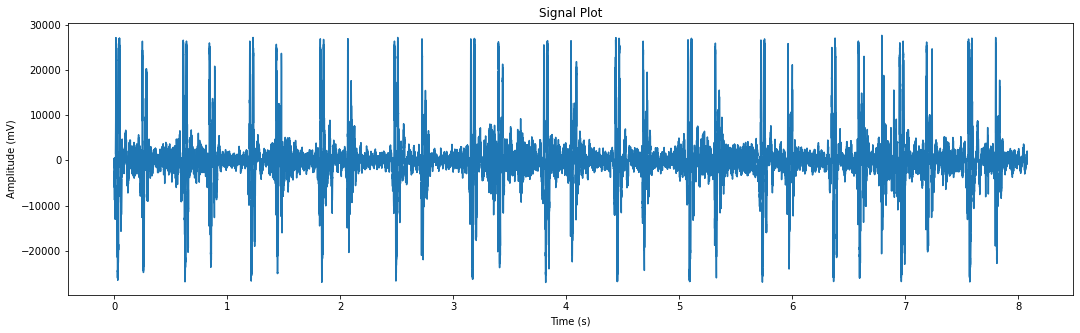

In [13]:
# Plot the signal
plt.figure(figsize=(18,5))
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Plot')
plt.show()

In [14]:
#Daubechies Wavelet
#lpf
h = [0]*4
h[0] = (1 + math.sqrt(3)) / (4 * math.sqrt(2))
h[1] = (3 + math.sqrt(3)) / (4 * math.sqrt(2))
h[2] = (3 - math.sqrt(3)) / (4 * math.sqrt(2))
h[3] = (1 - math.sqrt(3)) / (4 * math.sqrt(2))

#hpf
g = [0]*4

for i in range(4):
    g[i] = math.pow(-1, i) * h[3-i]
    

print("nilai h0 = ", round(h[0], 2))
print("nilai h1 = ", round(h[1], 2))
print("nilai h2 = ", round(h[2], 2))
print("nilai h3 = ", round(h[3], 2))
print("---")

print("nilai g0 = ", round(g[0], 2))
print("nilai g1 = ", round(g[1], 2))
print("nilai g2 = ", round(g[2], 2))
print("nilai g3 = ", round(g[3], 2))

nilai h0 =  0.48
nilai h1 =  0.84
nilai h2 =  0.22
nilai h3 =  -0.13
---
nilai g0 =  -0.13
nilai g1 =  -0.22
nilai g2 =  0.84
nilai g3 =  -0.48


In [15]:
ndat = len(amplitude_right)
ndat

64624

In [16]:
def dekomposisi(div, sinyal):
    a = [0.0] * (ndat // div)
    d = [0.0] * (ndat // div)
    
    for i in range(1, ndat//div):
        a[i] = 0.0
        d[i] = 0.0
        for j in range(4):
            if 2*i+j < len(sinyal):
                a[i] += h[j] * sinyal[2*i+j] #h[1] * sinyal[2*i-1] + h[2] * sinyal[2*i-2]
                d[i] += g[j] * sinyal[2*i+j]
                
    return a, d

In [26]:
def plotA(level, div, a):
    plt.figure(figsize=(18, 5))
    plt.subplot(211)
    plt.plot(time[:ndat//div-1], a[1:])
    plt.title(f'Approximation Coefficients Level {level}', fontsize=14)  # Mengatur ukuran huruf judul
    plt.xlabel('Time (s)', fontsize=14)  # Mengatur ukuran huruf label x-axis
    plt.ylabel('Amplitude (mV)', fontsize=14)  # Mengatur ukuran huruf label y-axis
    plt.tick_params(labelsize=12)  # Mengatur ukuran huruf pada tick-tick sumbu x dan y
    plt.show()

In [24]:
def plotD(level, div, d):
    plt.figure(figsize=(18, 5))
    plt.subplot(211)
    plt.plot(time[:ndat//div-1], d[1:])
    plt.title(f'Detail Coefficients Level {level}', fontsize=14)
    plt.xlabel('Time (s)', fontsize=14)
    plt.ylabel('Amplitude (mV)', fontsize=14)
    plt.show()

In [19]:
#dekomposisi 1
a1, d1 = dekomposisi(2, amplitude_right)
#plotA(1, 2, a1)
#plotD(1, 2, d1)

In [20]:
#dekomposisi 2
a2, d2 = dekomposisi(4, a1)
#plotA(2, 4, a2)
#plotD(2, 4, d2)

In [21]:
#dekomposisi 3
a3, d3 = dekomposisi(8, a2)
#plotA(3, 8, a3)
#plotD(3, 8, d3)

In [22]:
#dekomposisi 4
a4, d4 = dekomposisi(16, a3)
#plotA(4, 16, a4)
#plotD(4, 16, d4)

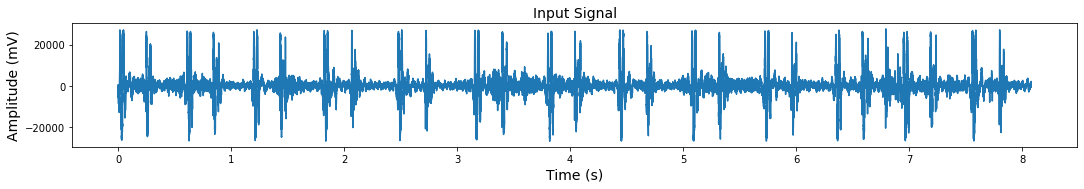

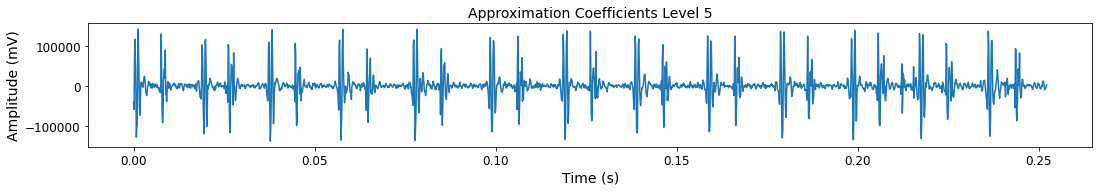

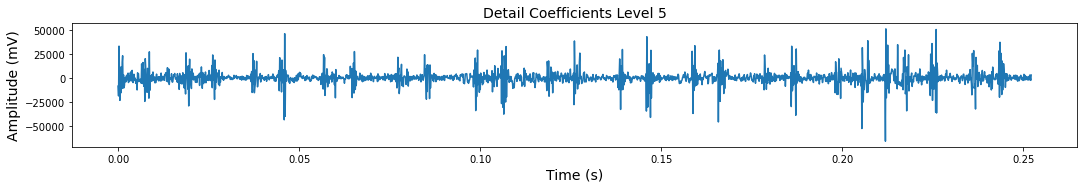

In [29]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Amplitude (mV)', fontsize=14)
plt.title('Input Signal', fontsize=14)
plt.show()
#dekomposisi 5
a5, d5 = dekomposisi(32, a4)
plotA(5, 32, a5)
plotD(5, 32, d5)

In [20]:
#dekomposisi 6
a6, d6 = dekomposisi(64, a5)
#plotA(6, 64, a6)
#plotD(6, 64, d6)

In [21]:
# Plot the signal
#plt.figure(figsize=(18, 5))
#plt.subplot(211)
#plt.plot(time, amplitude_right)
#plt.xlabel('Time (s)')
#plt.ylabel('Amplitude')
#plt.title('Signal Asli')
#plt.show()

#dekomposisi 7
a7, d7 = dekomposisi(128, a6)
#plotA(7, 128, a7)
#plotD(7, 128, d7)

In [22]:
#dekomposisi 8
a8, d8 = dekomposisi(256, a7)
#plotA(8, 256, a8)
#plotD(8, 256, d8)

In [23]:
#dekomposisi 9
a9, d9 = dekomposisi(512, a8)
#plotA(9, 512, a9)
#plotD(9, 512, d9)

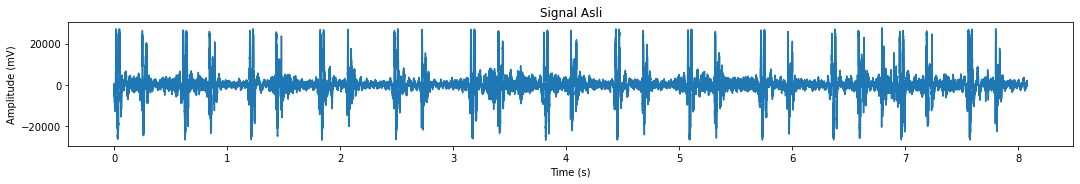

Koefisien Aproksimasi


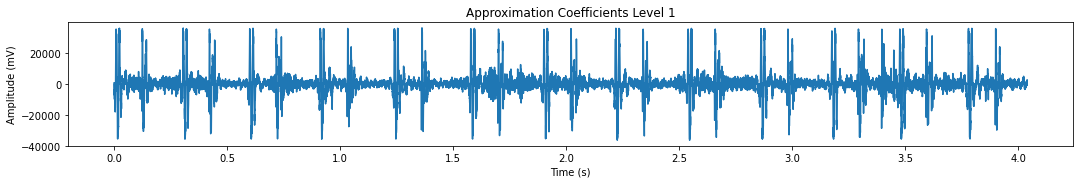

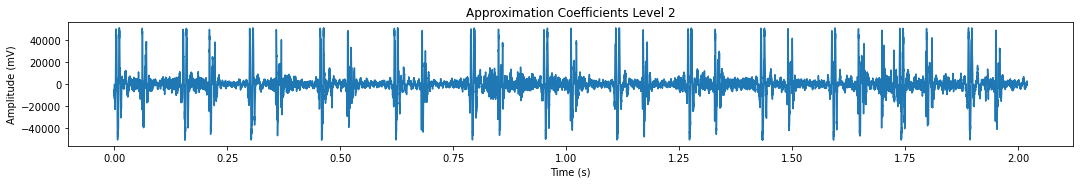

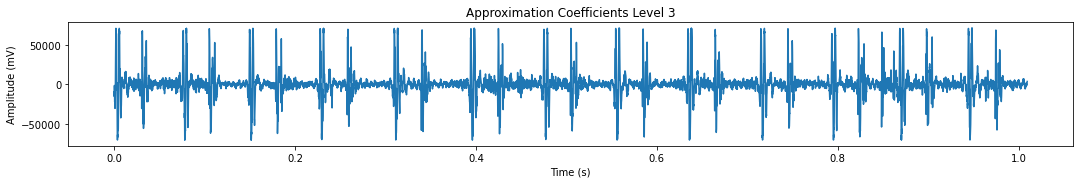

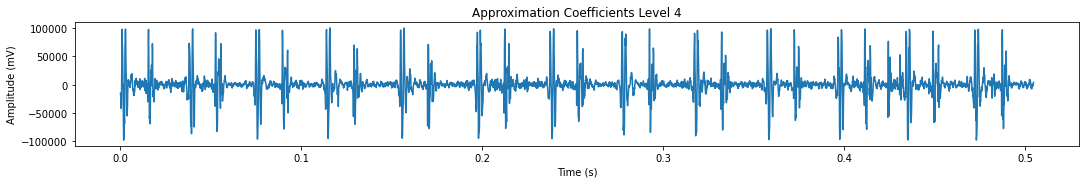

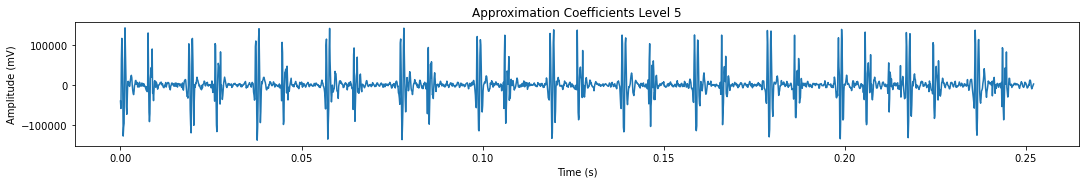

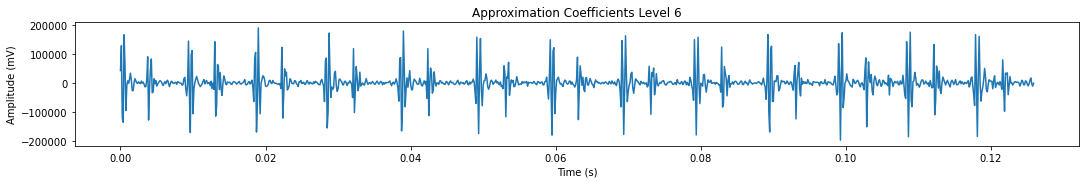

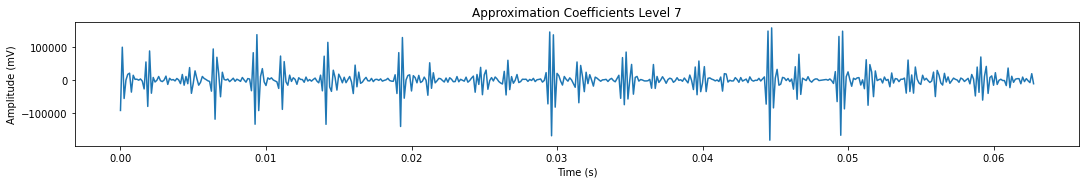

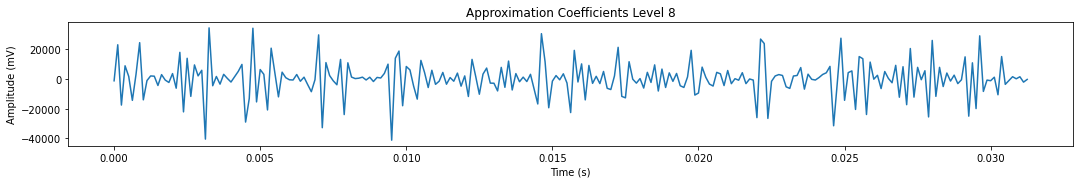

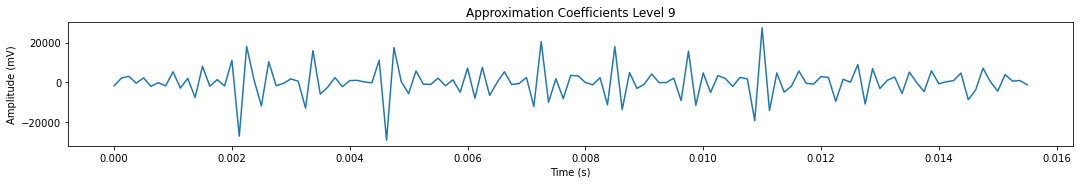

In [24]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()

print("Koefisien Aproksimasi")
plotA(1, 2, a1)
plotA(2, 4, a2)
plotA(3, 8, a3)
plotA(4, 16, a4)
plotA(5, 32, a5)
plotA(6, 64, a6)
plotA(7, 128, a7)
plotA(8, 256, a8)
plotA(9, 512, a9)

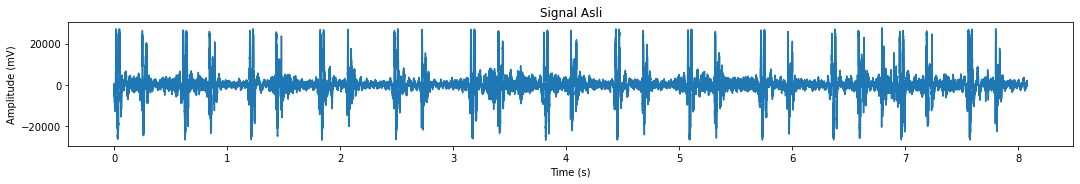

Koefisien Detail


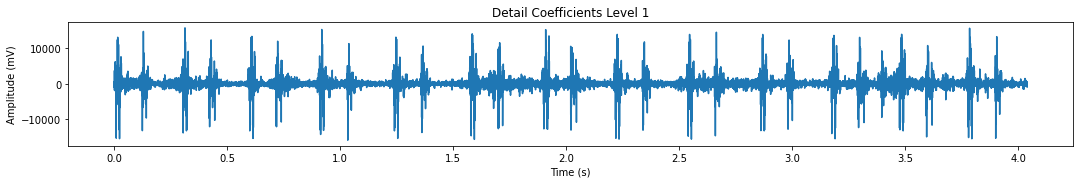

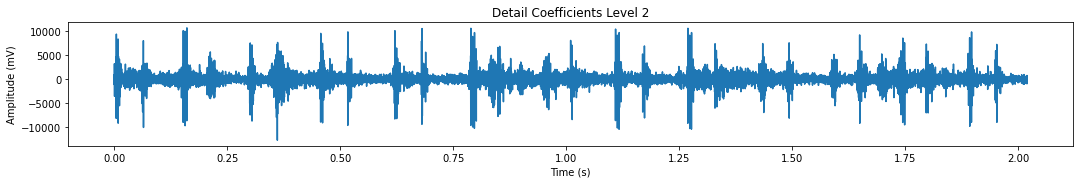

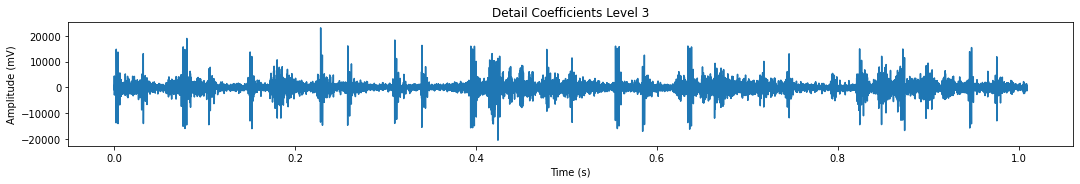

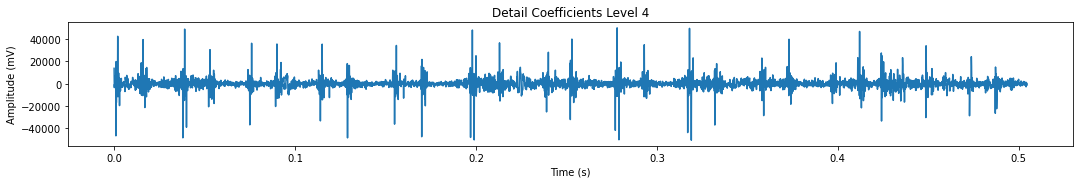

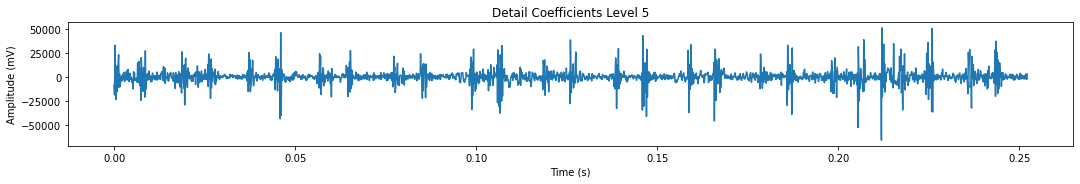

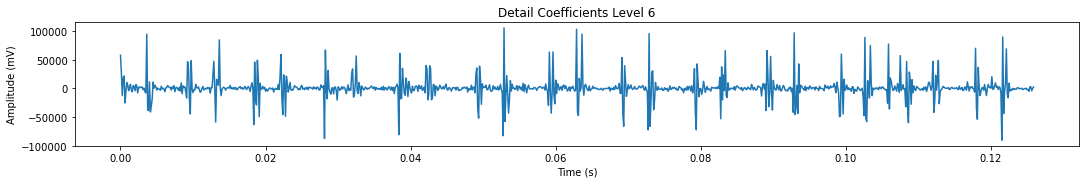

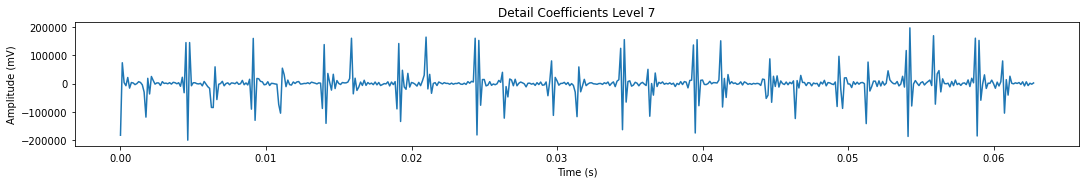

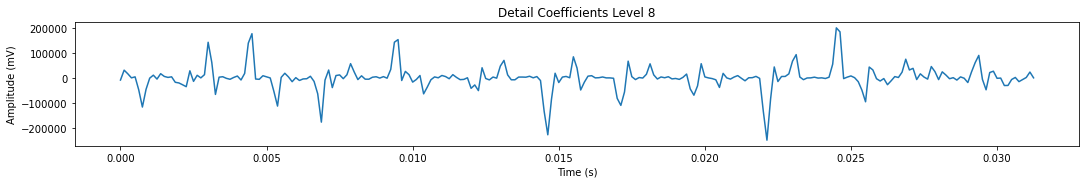

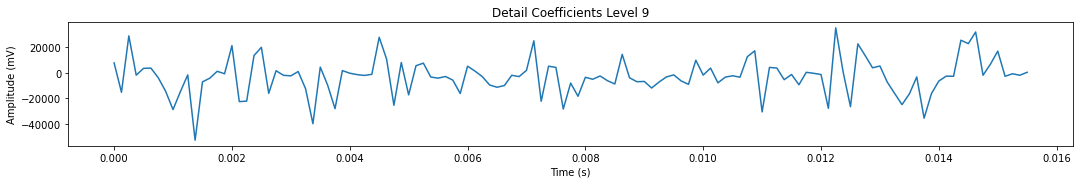

In [25]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()

print("Koefisien Detail")
plotD(1, 2, d1)
plotD(2, 4, d2)
plotD(3, 8, d3)
plotD(4, 16, d4)
plotD(5, 32, d5)
plotD(6, 64, d6)
plotD(7, 128, d7)
plotD(8, 256, d8)
plotD(9, 512, d9)

In [26]:
#coef rekon
ih = [0]*4
ih[0] = (1 - math.sqrt(3)) / (4 * math.sqrt(2))
ih[1] = (3 - math.sqrt(3)) / (4 * math.sqrt(2))
ih[2] = (3 + math.sqrt(3)) / (4 * math.sqrt(2))
ih[3] = (1 + math.sqrt(3)) / (4 * math.sqrt(2))

ig = [0]*4

for i in range(4):
    ig[i] = math.pow(-1, i) * ih[3-i]

In [27]:
def rekonstruksi(a, d):
    sinyal = [0.0] * len(a) * 2
    
    for i in range(len(a)):
        for j in range(4):
            if 2*i+j < len(sinyal):
                sinyal[2*i+j] += ih[j] * a[i] + ig[j] * d[i]
            #print(f"Sinyal saat i={i}: {sinyal}")
                
    return sinyal

In [28]:
def plotRekon(sinyal, level):
    time_rekon = np.arange(len(sinyal)) / fs
    plt.figure(figsize=(18, 5))
    plt.subplot(211)
    plt.plot(time_rekon, sinyal)
    plt.title(f'Sinyal Rekonstruksi Level {level}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.show()

In [29]:
a1_rekonstruksi = rekonstruksi(a1, d1)
a2_rekonstruksi = rekonstruksi(a2, d2)
a3_rekonstruksi = rekonstruksi(a3, d3)
a4_rekonstruksi = rekonstruksi(a4, d4)
a5_rekonstruksi = rekonstruksi(a5, d5)
a6_rekonstruksi = rekonstruksi(a6, d6)
a7_rekonstruksi = rekonstruksi(a7, d7)
a8_rekonstruksi = rekonstruksi(a8, d8)
a9_rekonstruksi = rekonstruksi(a9, d9)


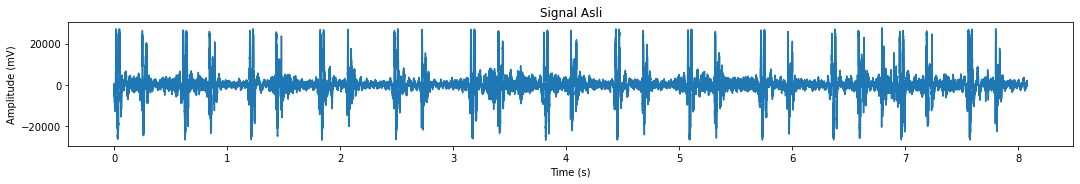

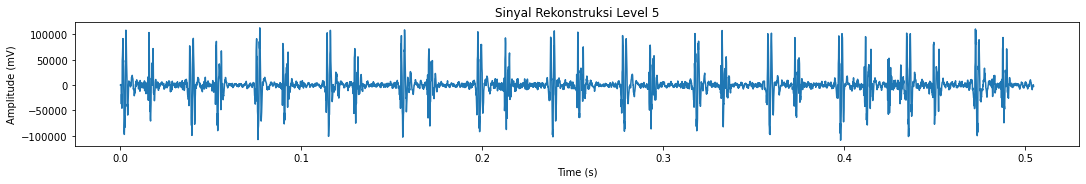

In [30]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()

plotRekon(a5_rekonstruksi, 5)

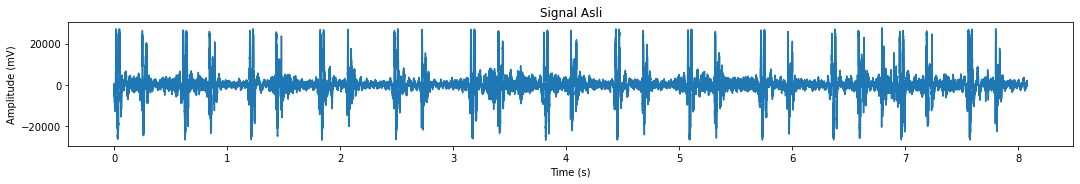

Sinyal Rekonstruksi


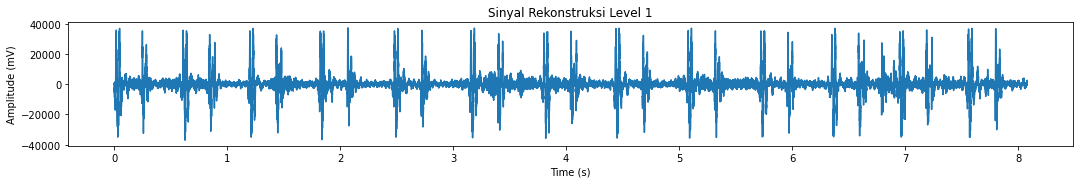

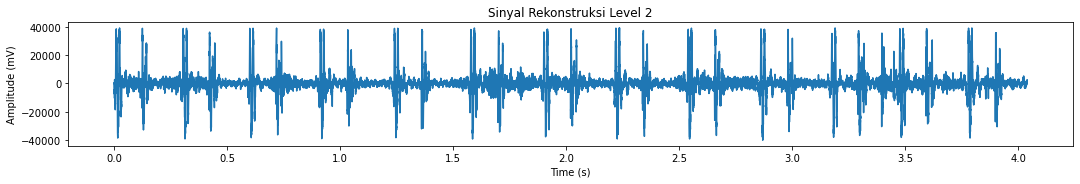

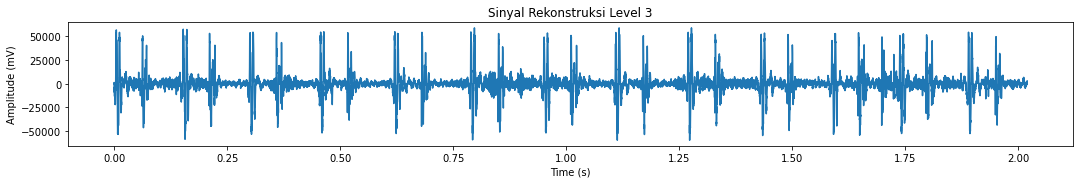

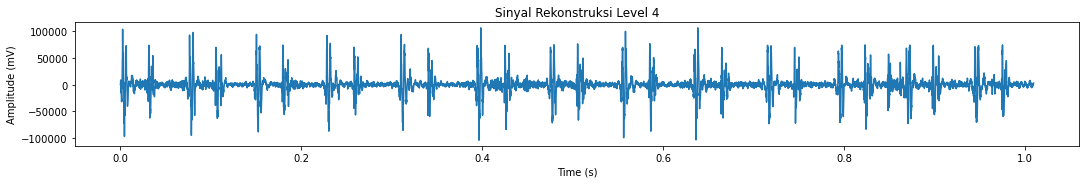

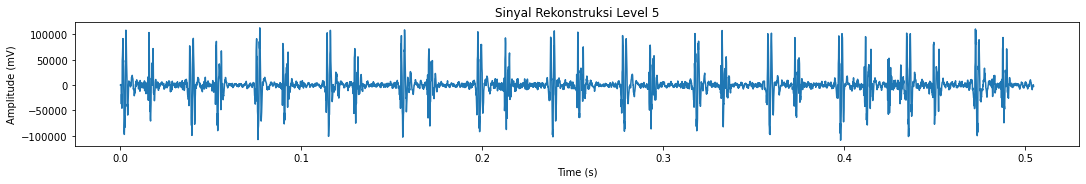

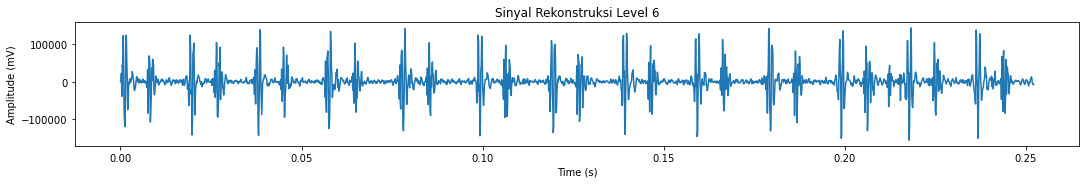

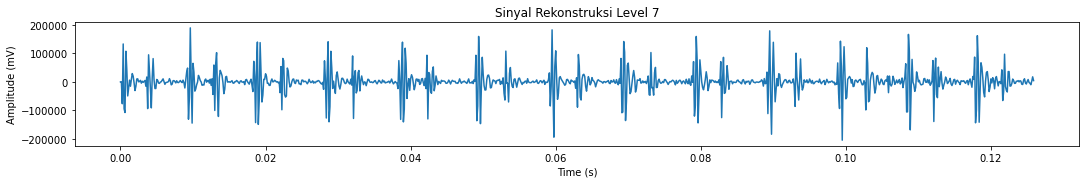

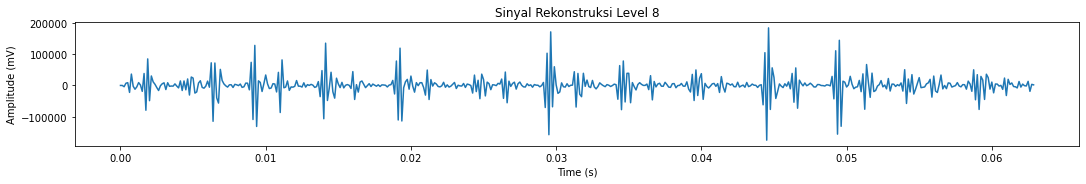

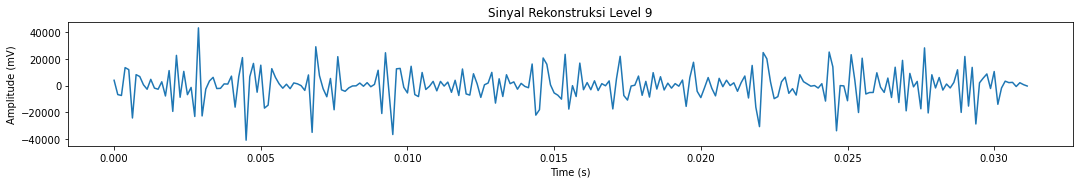

In [31]:
# Plot the signal
plt.figure(figsize=(18, 5))
plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()

print("Sinyal Rekonstruksi")
plotRekon(a1_rekonstruksi, 1)
plotRekon(a2_rekonstruksi, 2)
plotRekon(a3_rekonstruksi, 3)
plotRekon(a4_rekonstruksi, 4)
plotRekon(a5_rekonstruksi, 5)
plotRekon(a6_rekonstruksi, 6)
plotRekon(a7_rekonstruksi, 7)
plotRekon(a8_rekonstruksi, 8)
plotRekon(a9_rekonstruksi[2:], 9)

#print(a9_rekonstruksi)

In [32]:
def abs(sinyal):
    return np.abs(sinyal)

d5_abs = abs(d5)
a5_abs = abs(a5)
rekon5_abs = abs(a5_rekonstruksi)
rekon1_abs = abs(a1_rekonstruksi)

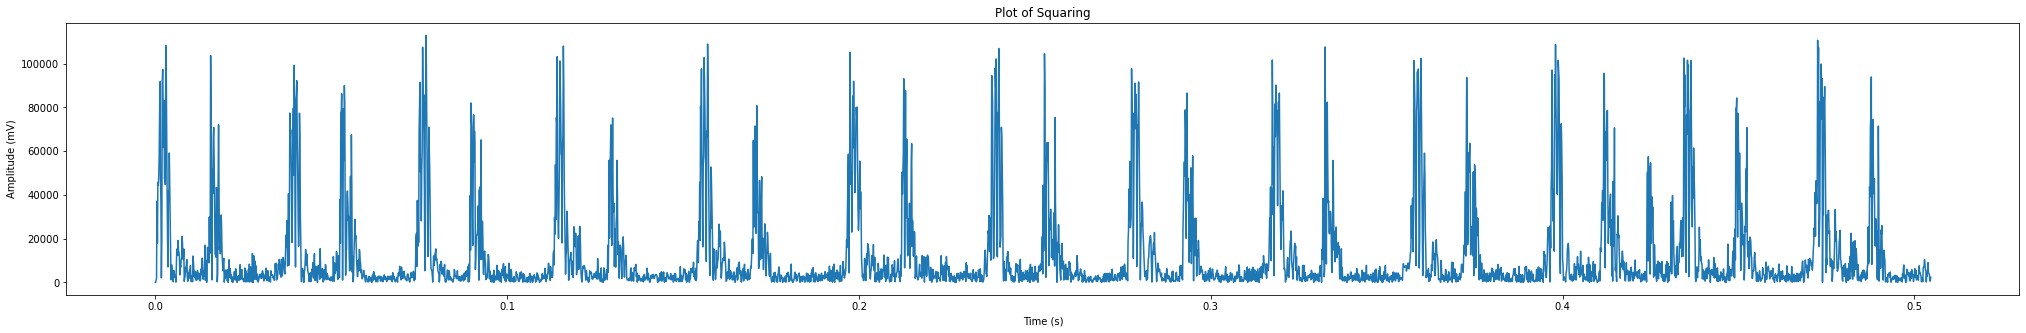

In [33]:
# Plotting untuk mav_a5
time_abs = np.arange(len(rekon5_abs)) / fs

plt.figure(figsize=(35, 5))
plt.plot(time_abs, rekon5_abs)
plt.title("Plot of Squaring")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV)")
plt.show()

In [34]:
#MAV
def MAV(sinyal, orde):
    n = len(sinyal)
    mav = [0] * n
    mav2 = [0] * n
    for k in range(n):
        mav1 = 0
        for m in range(orde):
            y1 = k - m
            if y1 < 0:
                mav1 += sinyal[0]
            else:
                # forward
                mav1 += sinyal[k - m]
        mav2[k] = mav1 / orde
        # backward
        mav3 = 0
        for m in range(orde):
            if k + m < n:
                mav3 += mav2[k + m]
        mav[k] = mav3 / orde
    return mav

In [35]:
mav_d5=MAV(d5_abs, 2)
mav_a5=MAV(a5_abs, 2)
mav_rekon5=MAV(rekon5_abs, 60)
mav_rekon1=MAV(rekon1_abs, 35)

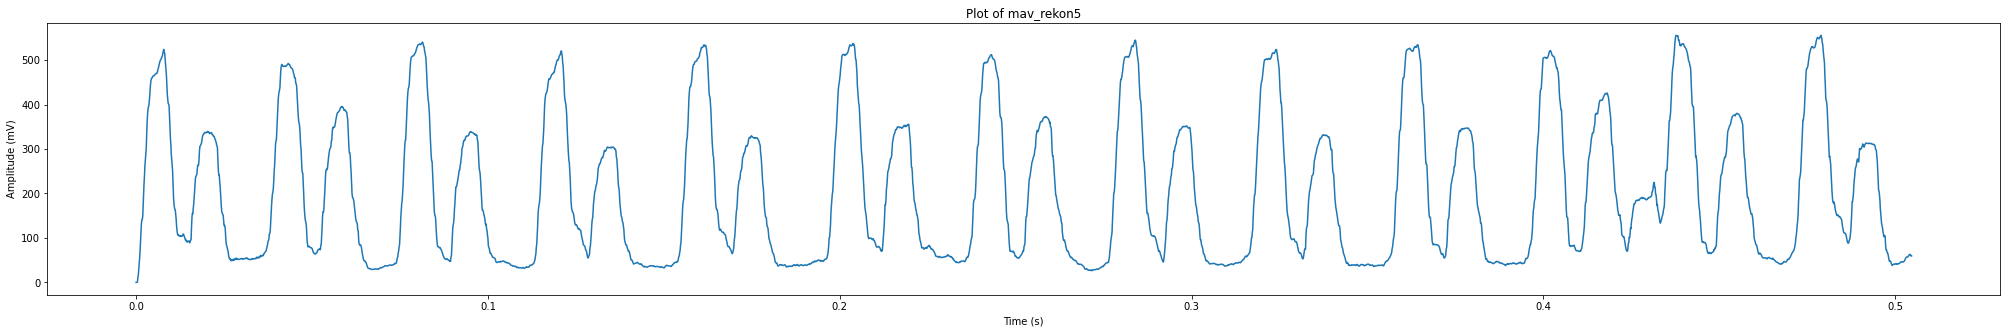

In [36]:
# Plotting untuk mav_a5
time_mav = np.arange(len(mav_rekon5)) / fs

plt.figure(figsize=(35, 5))
plt.plot(time_mav, mav_rekon5)
plt.title("Plot of mav_rekon5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()
#print(mav_rekon5)

In [37]:
def max(sinyal):
    S = 0
    for i in range(len(sinyal)):
        if S < sinyal[i]:
            S = sinyal[i]

    return S

def normalize_mav(mav):
    max_mav = max(mav)
    normmav = [0] * len(mav)
    for i in range(len(mav)):
        normmav[i] = mav[i] / max_mav
    return normmav

In [38]:
normalize_mavd5 = normalize_mav(mav_d5)
normalize_mava5 = normalize_mav(mav_a5)
normalize_rekon5 = normalize_mav(mav_rekon5)
normalize_rekon1 = normalize_mav(mav_rekon1)

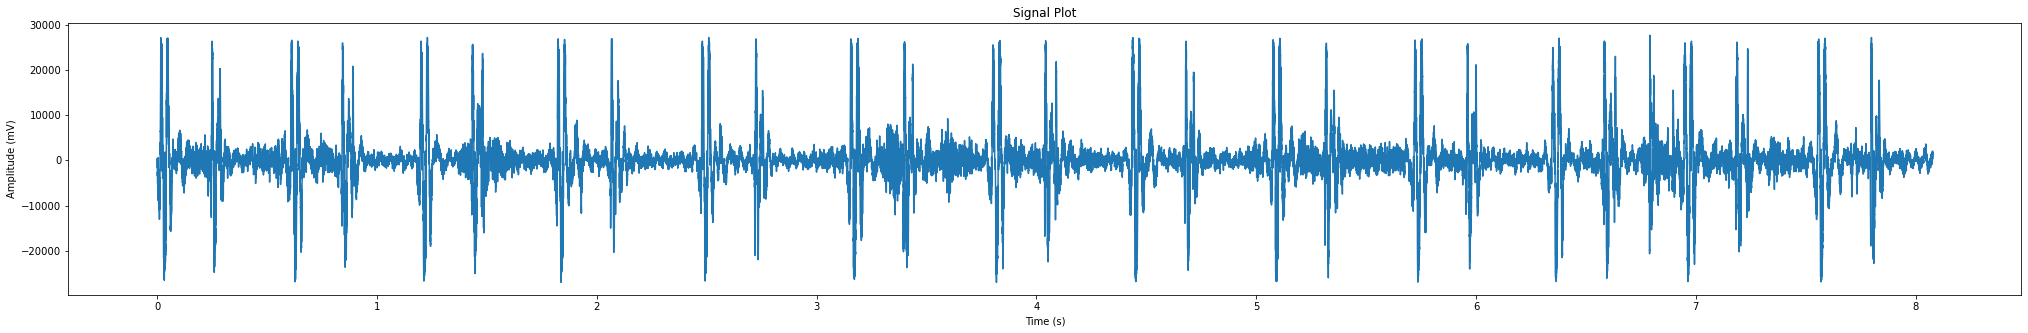

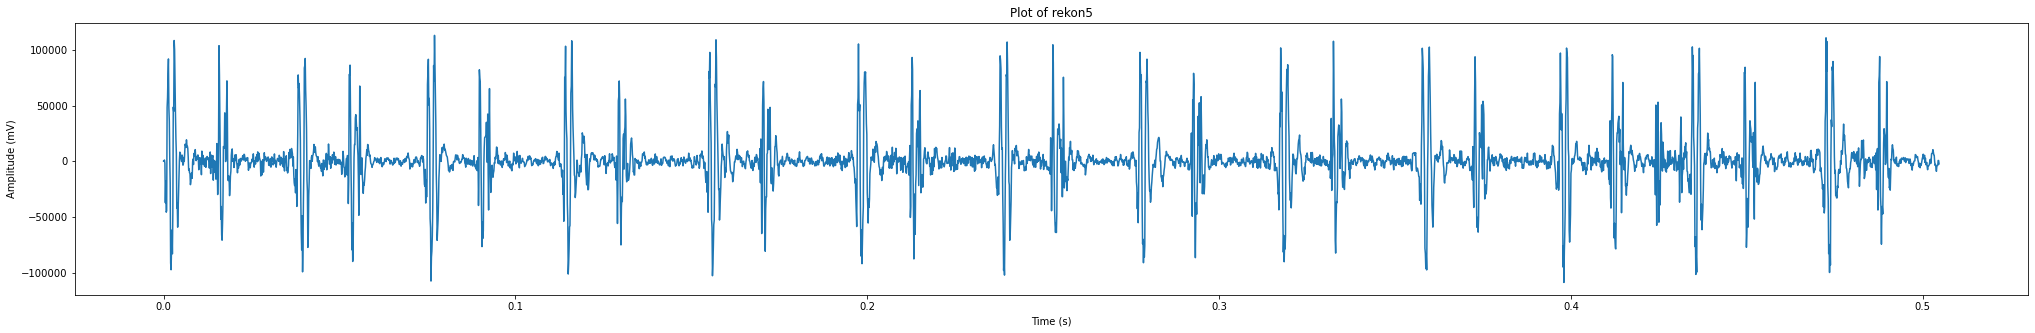

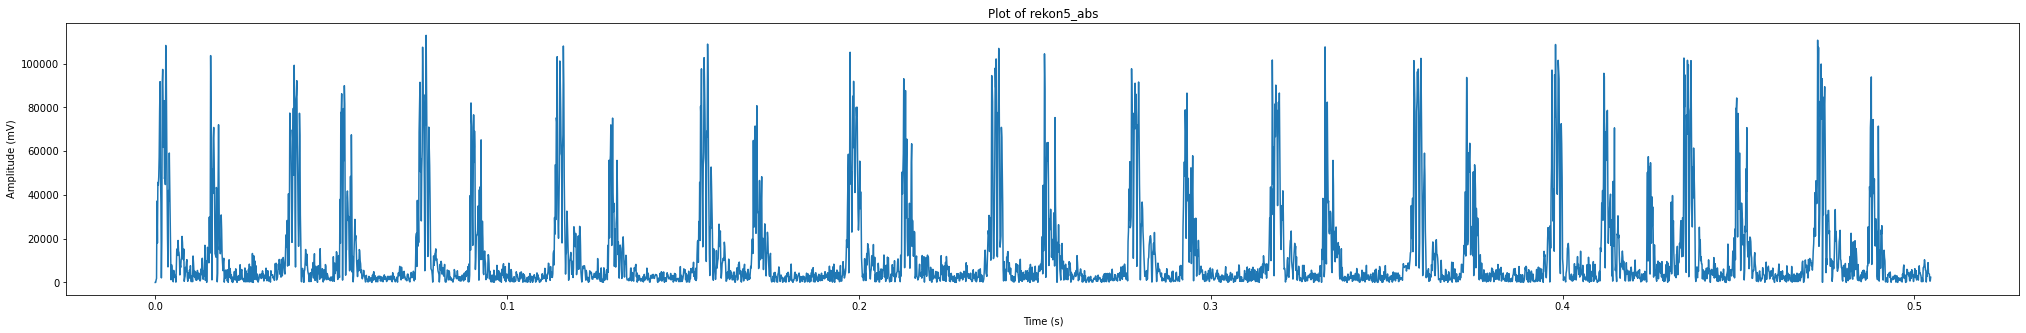

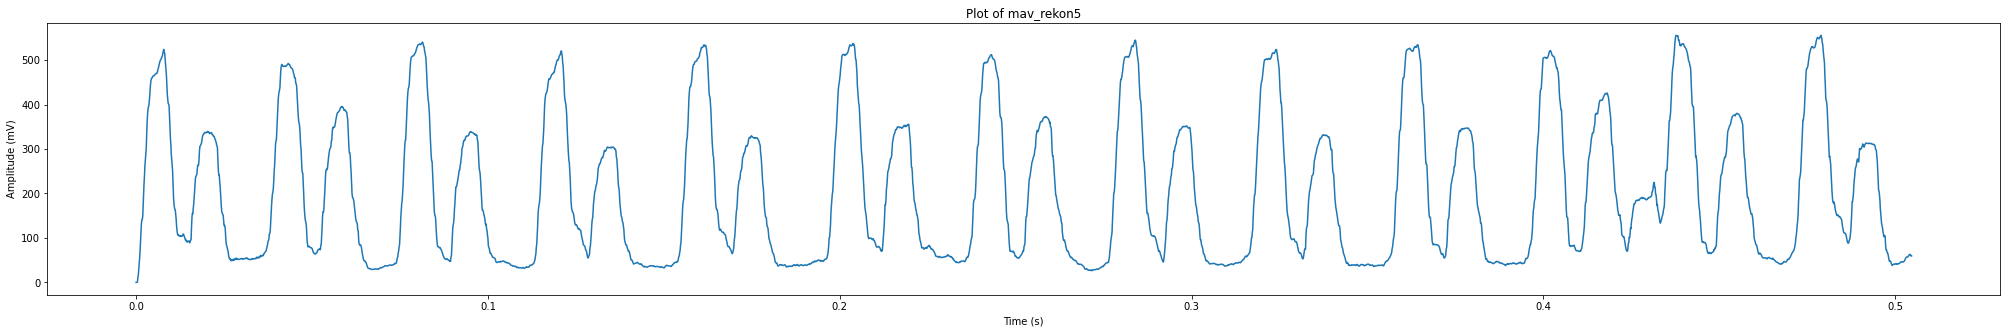

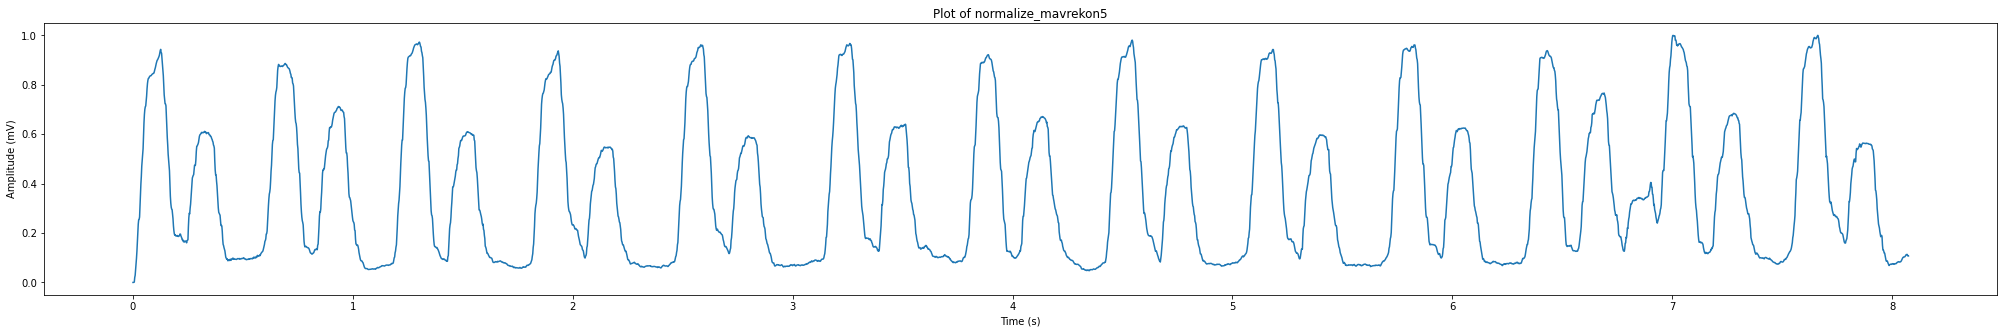

In [39]:
# Plot the signal
plt.figure(figsize=(35, 5))
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Plot')
plt.show()

time_rekon = np.arange(len(a5_rekonstruksi)) / fs
# Plotting untuk a5
plt.figure(figsize=(35, 5))
plt.plot(time_rekon, a5_rekonstruksi)
plt.title("Plot of rekon5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()

time_abs = np.arange(len(rekon5_abs)) / fs
# Plotting untuk a5_abs
plt.figure(figsize=(35, 5))
plt.plot(time_abs,rekon5_abs)
plt.title("Plot of rekon5_abs")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()

# Plotting untuk mav_a5
plt.figure(figsize=(35, 5))
plt.plot(time_mav, mav_rekon5)
plt.title("Plot of mav_rekon5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()


time_normalize = np.arange(len(normalize_rekon5)) / fs

# Plotting untuk normalize_mava5
plt.figure(figsize=(35, 5))
plt.plot(time_normalize*16,normalize_rekon5)
plt.title("Plot of normalize_mavrekon5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()


In [40]:
def thresholdcoba(mav, thres):
    max_value = np.max(mav)
    res = []
    dt = len(mav)/8000
    for i in mav:
        if i > thres * max_value:
            res.append(1)
            print(len(res)*16/8000)  # cetak nilai sumbu x saat append(1)
        else:
            res.append(0)
    return res

In [41]:
threshold_rekon5coba=thresholdcoba(normalize_rekon5, 0.4)

0.04
0.042
0.044
0.046
0.048
0.05
0.052
0.054
0.056
0.058
0.06
0.062
0.064
0.066
0.068
0.07
0.072
0.074
0.076
0.078
0.08
0.082
0.084
0.086
0.088
0.09
0.092
0.094
0.096
0.098
0.1
0.102
0.104
0.106
0.108
0.11
0.112
0.114
0.116
0.118
0.12
0.122
0.124
0.126
0.128
0.13
0.132
0.134
0.136
0.138
0.14
0.142
0.144
0.146
0.148
0.15
0.152
0.154
0.156
0.158
0.16
0.162
0.164
0.166
0.168
0.27
0.272
0.274
0.276
0.278
0.28
0.282
0.284
0.286
0.288
0.29
0.292
0.294
0.296
0.298
0.3
0.302
0.304
0.306
0.308
0.31
0.312
0.314
0.316
0.318
0.32
0.322
0.324
0.326
0.328
0.33
0.332
0.334
0.336
0.338
0.34
0.342
0.344
0.346
0.348
0.35
0.352
0.354
0.356
0.358
0.36
0.362
0.364
0.366
0.368
0.37
0.372
0.374
0.376
0.378
0.38
0.382
0.628
0.63
0.632
0.634
0.636
0.638
0.64
0.642
0.644
0.646
0.648
0.65
0.652
0.654
0.656
0.658
0.66
0.662
0.664
0.666
0.668
0.67
0.672
0.674
0.676
0.678
0.68
0.682
0.684
0.686
0.688
0.69
0.692
0.694
0.696
0.698
0.7
0.702
0.704
0.706
0.708
0.71
0.712
0.714
0.716
0.718
0.72
0.722
0.724
0.726
0.728


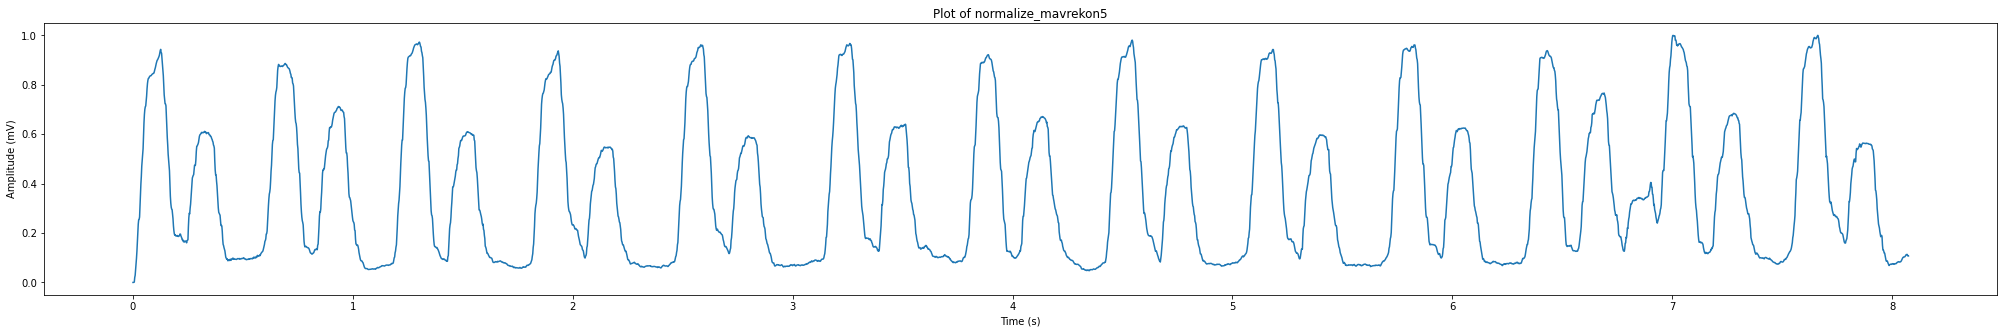

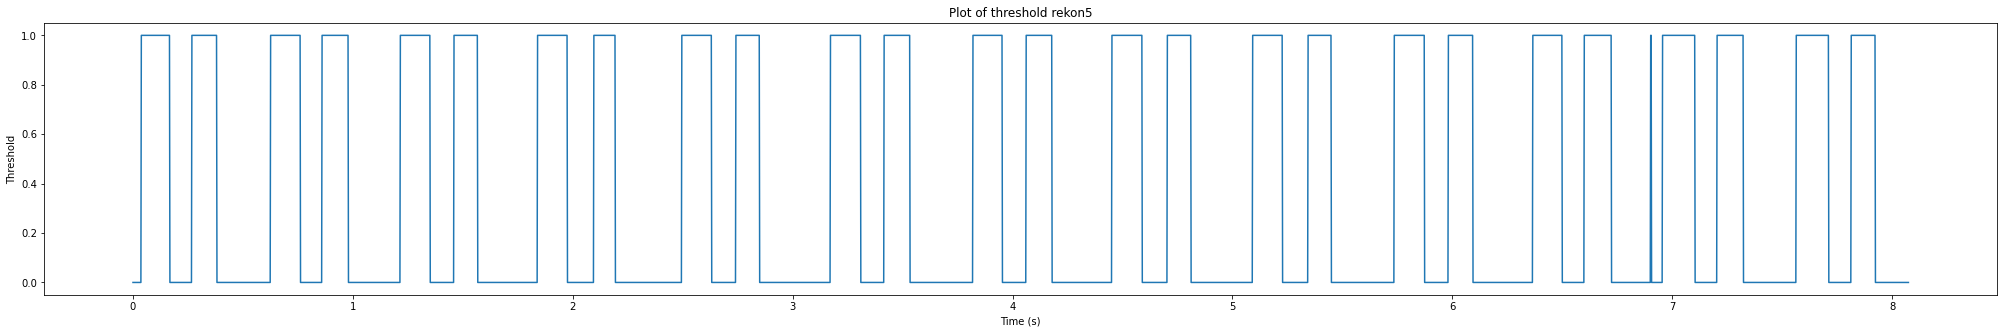

In [42]:
time_normalize = np.arange(len(normalize_rekon5)) / fs *16

# Plotting untuk normalize_mava5
plt.figure(figsize=(35, 5))
plt.plot(time_normalize,normalize_rekon5)
plt.title("Plot of normalize_mavrekon5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.show()


time_threshold = np.arange(len(threshold_rekon5coba)) / fs *16

# Plotting untuk threshold_rekon5
plt.figure(figsize=(35, 5))
plt.plot(time_threshold, threshold_rekon5coba)
plt.title("Plot of threshold rekon5")
plt.xlabel('Time (s)')
plt.ylabel("Threshold")
plt.show()

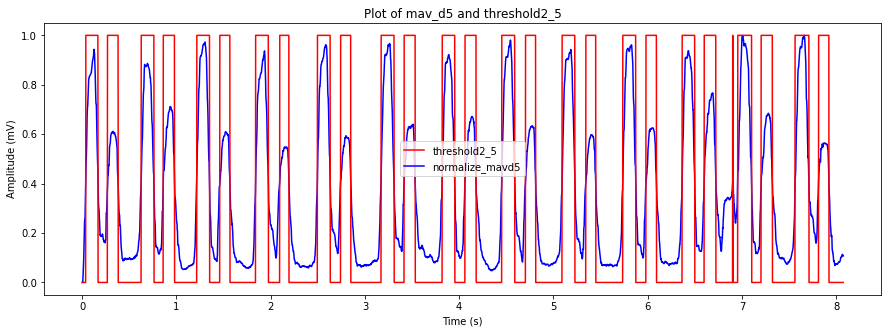

In [43]:



plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_threshold, threshold_rekon5coba, color='red', label='threshold2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize, normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()

# tampilkan grafik
plt.show()

In [44]:
def thresholdcoba3(mav, thres):
    max_value = np.max(mav)
    res = []
    x_start = []
    x_end = []
    middle_points = []  # New list to store the middle points
    selisih_values = []
    for i in range(len(mav)):
        if i == 0 and mav[i] > thres * max_value:
            x_start.append(i + 1)  # tambahkan +1 pada x_start
        elif i == len(mav) - 1 and mav[i] > thres * max_value:
            x_end.append(i + 1)  # tambahkan +1 pada x_end
        elif mav[i] > thres * max_value and mav[i - 1] <= thres * max_value:
            x_start.append(i + 1)  # tambahkan +1 pada x_start
        elif mav[i] > thres * max_value and mav[i + 1] <= thres * max_value:
            x_end.append(i + 1)  # tambahkan +1 pada x_end

    for start, end in zip(x_start, x_end):
        print("x start:", start / 8000 * 16, "x end:", end / 8000 * 16)
        #print("x start:", start / 8000 * 16) 
        selisih = (end-start) / 8000 * 16
        middle_point = ((start + end) / 2) / 8000 * 16
        middle_points.append(middle_point)
        selisih_values.append(selisih)
        print("Middle point:", middle_point)
        print("Selisih:", selisih)
        #print("")
        
    #for start, end in zip(x_start, x_end):
        #print("x start:", start / 8000 * 16, "x end:", end / 8000 * 16)
        #print("x end:", end / 8000 * 16) 

    for i in mav:
        res.append(1) if i > thres * max_value else res.append(0)
    return res, middle_points, selisih_values

In [45]:
threshold_rekon5coba3 = thresholdcoba3(normalize_rekon5, 0.4)
res, middle_points, selisih_values = threshold_rekon5coba3

x start: 0.04 x end: 0.168
Middle point: 0.104
Selisih: 0.128
x start: 0.27 x end: 0.382
Middle point: 0.326
Selisih: 0.112
x start: 0.628 x end: 0.762
Middle point: 0.695
Selisih: 0.134
x start: 0.862 x end: 0.98
Middle point: 0.921
Selisih: 0.118
x start: 1.218 x end: 1.352
Middle point: 1.285
Selisih: 0.134
x start: 1.462 x end: 1.568
Middle point: 1.515
Selisih: 0.106
x start: 1.842 x end: 1.976
Middle point: 1.909
Selisih: 0.134
x start: 2.098 x end: 2.194
Middle point: 2.146
Selisih: 0.096
x start: 2.498 x end: 2.632
Middle point: 2.565
Selisih: 0.134
x start: 2.744 x end: 2.85
Middle point: 2.797
Selisih: 0.106
x start: 3.174 x end: 3.31
Middle point: 3.242
Selisih: 0.136
x start: 3.418 x end: 3.534
Middle point: 3.476
Selisih: 0.116
x start: 3.822 x end: 3.954
Middle point: 3.888
Selisih: 0.132
x start: 4.064 x end: 4.18
Middle point: 4.122
Selisih: 0.116
x start: 4.454 x end: 4.59
Middle point: 4.522
Selisih: 0.136
x start: 4.706 x end: 4.812
Middle point: 4.759
Selisih: 0.106

In [46]:
def thresholdcoba33(mav, thres):
    max_value = np.max(mav)
    res = []
    x_start = []
    x_end = []
    selisih_values = []  
    middle_points = []  # Define middle_points as an empty list inside the function
    for i in range(len(mav)):
        if i == 0 and mav[i] > thres * max_value:
            x_start.append(i + 1)  # tambahkan +1 pada x_start
        elif i == len(mav) - 1 and mav[i] > thres * max_value:
            x_end.append(i + 1)  # tambahkan +1 pada x_end
        elif mav[i] > thres * max_value and mav[i - 1] <= thres * max_value and mav[i + 1] >= thres:
            x_start.append(i + 1)  # tambahkan +1 pada x_start
        elif mav[i] > thres * max_value and mav[i + 1] <= thres * max_value and mav[i - 1] >= thres:
            x_end.append(i + 1)  # tambahkan +1 pada x_end
                
    for i in range(len(x_start)):
        start = x_start[min(i, len(x_start) - 1)]
        end = x_end[min(i, len(x_end) - 1)]
        x_start_middle = ((start + end) / 2) / 8000 * 16
        selisih = (end-start)/ 8000 * 16
        selisih_values.append(selisih)

        
        skip_iteration = False  # Flag to skip appending x_start_middle
        if i < len(x_start) - 1:
            prev_start = x_start[i - 1]
            prev_end = x_end[i -  1]
            prev_x_start_middle = ((prev_start + prev_end) / 2) / 8000 * 16
            difference = x_start_middle - prev_x_start_middle
            print("")
            print("dif :", difference)
            if i > 0:
                if difference < 0.150 and selisih < 0.02 :
                    skip_iteration = True
                if difference > 0.150 and selisih < 0.02 :
                    skip_iteration = True
                    
        print(start/8000*16, end/8000*16)
        print("x start:", start / 8000 * 16, "x end:", end / 8000 * 16, "selisih :", selisih)
        if not skip_iteration:
            middle_point = x_start_middle
            middle_points.append(middle_point)
            print("Middle point:", middle_point)
            print("") 

    for i in mav:
        res.append(1) if i > thres * max_value else res.append(0)
        
    return res, middle_points, selisih_values

In [47]:
threshold_rekon5coba33 = thresholdcoba33(normalize_rekon5, 0.4)
res33, middle_points33, selisih_values33 = threshold_rekon5coba33


dif : -7.766
0.04 0.168
x start: 0.04 x end: 0.168 selisih : 0.128
Middle point: 0.104


dif : 0.22200000000000003
0.27 0.382
x start: 0.27 x end: 0.382 selisih : 0.112
Middle point: 0.326


dif : 0.36899999999999994
0.628 0.762
x start: 0.628 x end: 0.762 selisih : 0.134
Middle point: 0.695


dif : 0.2260000000000001
0.862 0.98
x start: 0.862 x end: 0.98 selisih : 0.118
Middle point: 0.921


dif : 0.3639999999999999
1.218 1.352
x start: 1.218 x end: 1.352 selisih : 0.134
Middle point: 1.285


dif : 0.22999999999999998
1.462 1.568
x start: 1.462 x end: 1.568 selisih : 0.106
Middle point: 1.515


dif : 0.39400000000000013
1.842 1.976
x start: 1.842 x end: 1.976 selisih : 0.134
Middle point: 1.909


dif : 0.23699999999999988
2.098 2.194
x start: 2.098 x end: 2.194 selisih : 0.096
Middle point: 2.146


dif : 0.41900000000000004
2.498 2.632
x start: 2.498 x end: 2.632 selisih : 0.134
Middle point: 2.565


dif : 0.2320000000000002
2.744 2.85
x start: 2.744 x end: 2.85 selisih : 0.106
Middl

In [48]:
print(middle_points33)

[0.104, 0.326, 0.695, 0.921, 1.285, 1.515, 1.909, 2.146, 2.565, 2.797, 3.242, 3.476, 3.888, 4.122, 4.522, 4.759, 5.161, 5.398, 5.806, 6.039, 6.434, 6.663, 7.031, 7.265, 7.639, 7.87]


In [49]:
print("selisih value code 1:", selisih_values)
print("selisih value code 2:", selisih_values33)

selisih value code 1: [0.128, 0.112, 0.134, 0.118, 0.134, 0.106, 0.134, 0.096, 0.134, 0.106, 0.136, 0.116, 0.132, 0.116, 0.136, 0.106, 0.134, 0.104, 0.136, 0.11, 0.132, 0.122, 0.002, 0.146, 0.118, 0.146, 0.108]
selisih value code 2: [0.128, 0.112, 0.134, 0.118, 0.134, 0.106, 0.134, 0.096, 0.134, 0.106, 0.136, 0.116, 0.132, 0.116, 0.136, 0.106, 0.134, 0.104, 0.136, 0.11, 0.132, 0.122, 0.002, 0.146, 0.118, 0.146, 0.108]


In [50]:
def SuaraSkip(middle_points):
    middle_points_final = []
    for i in range(len(middle_points)):
        if i < len(middle_points) - 1:
            difference = middle_points[i+1] - middle_points[i]
            skip_iteration = False
            if difference < 0.120:
                skip_iteration = True
                print("middle point skip", middle_points[i])
                print(difference)
            if not skip_iteration:
                middle_points_final.append(middle_points[i])
                print("Middle point:", middle_points[i])
                print("") 
        else:
            middle_points_final.append(middle_points[i])
            print("Middle point:", middle_points[i])
            print("")
    return middle_points_final

In [51]:
middle_points_final = SuaraSkip(middle_points33)

Middle point: 0.104

Middle point: 0.326

Middle point: 0.695

Middle point: 0.921

Middle point: 1.285

Middle point: 1.515

Middle point: 1.909

Middle point: 2.146

Middle point: 2.565

Middle point: 2.797

Middle point: 3.242

Middle point: 3.476

Middle point: 3.888

Middle point: 4.122

Middle point: 4.522

Middle point: 4.759

Middle point: 5.161

Middle point: 5.398

Middle point: 5.806

Middle point: 6.039

Middle point: 6.434

Middle point: 6.663

Middle point: 7.031

Middle point: 7.265

Middle point: 7.639

Middle point: 7.87



In [52]:
def detectS1andS2(middle_points, mav):
    labels = []  # New list to store the labels
    resAll = [0]*len(mav)
    resS1 = [0] * len(mav)
    resS2 = [0] * len(mav)
    
    for i in range(len(middle_points) - 1):
        difference = middle_points[i+1] - middle_points[i]
        
        if 0.150 <= round(difference, 2) <= 0.350:
            label = "s1"
            labels.append(label)
            print(label)
            resS1[int(middle_points[i] * 8000 / 16)] = 1  # Append 1 to resS1
            resAll[int(middle_points[i] * 8000 / 16)] = 1
            
        elif 0.350 <= round(difference, 2) <= 0.800:
            label = "s2"
            labels.append(label)
            print(label)
            resS2[int(middle_points[i] * 8000 / 16)] = 1  # Append 1 to resS1
            resAll[int(middle_points[i] * 8000 / 16)] = 1
        else:
            label = "skip"
            labels.append(label)
            print(label)
        print(middle_points[i])
        print("Difference:", round(difference, 2))
        print("")
        
    # Assign the label to the last middle point
    if labels[-1] == "s1":
        label_last = "s2"
        resS1[int(middle_points[-1] * 8000 / 16)] = 0  # Append 0 to resS1
        resS2[int(middle_points[-1] * 8000 / 16)] = 1  # Append 1 to resS2
    else:
        label_last = "s1"
        resS1[int(middle_points[-1] * 8000 / 16)] = 1  # Append 1 to resS1
        resS2[int(middle_points[-1] * 8000 / 16)] = 0  # Append 0 to resS2
    resAll[int(middle_points[-1] * 8000 / 16)] = 1  # Append 1 to resAll
    labels.append(label_last)
    print(label_last)
    print(middle_points[-1])
    
    return resS1, resS2, resAll
    

In [53]:
detectS1andS2 = detectS1andS2(middle_points_final, normalize_rekon5)
cobaS1, cobaS2, resAll = detectS1andS2

s1
0.104
Difference: 0.22

s2
0.326
Difference: 0.37

s1
0.695
Difference: 0.23

s2
0.921
Difference: 0.36

s1
1.285
Difference: 0.23

s2
1.515
Difference: 0.39

s1
1.909
Difference: 0.24

s2
2.146
Difference: 0.42

s1
2.565
Difference: 0.23

s2
2.797
Difference: 0.44

s1
3.242
Difference: 0.23

s2
3.476
Difference: 0.41

s1
3.888
Difference: 0.23

s2
4.122
Difference: 0.4

s1
4.522
Difference: 0.24

s2
4.759
Difference: 0.4

s1
5.161
Difference: 0.24

s2
5.398
Difference: 0.41

s1
5.806
Difference: 0.23

s2
6.039
Difference: 0.4

s1
6.434
Difference: 0.23

s2
6.663
Difference: 0.37

s1
7.031
Difference: 0.23

s2
7.265
Difference: 0.37

s1
7.639
Difference: 0.23

s2
7.87


In [54]:
time_normalize = np.arange(len(normalize_rekon5)) / fs *16

## Plotting untuk normalize_mava5
#plt.figure(figsize=(35, 5))
#plt.plot(time_normalize,normalize_rekon5)
#plt.title("Plot of normalize_mavrekon5")
#plt.xlabel("Sample")
#plt.ylabel("amplitude")
#plt.show()

time_threshold2 = np.arange(len(res)) / fs *16

#Plotting untuk threshold_rekon5
#plt.figure(figsize=(35, 5))
#plt.plot(time_threshold2, res)
#plt.title("Plot of threshold rekon5")
#plt.xlabel("Sample")
#plt.ylabel("Threshold")
#plt.show()

time_thresholdAll = np.arange(len(resAll)) / fs *16
#plt.figure(figsize=(35, 5))
#plt.plot(time_thresholdAll, resAll)
#plt.title("Plot of threshold rekon5")
#plt.xlabel("Sample")
#plt.ylabel("Threshold")
#plt.show()

time_thresholdS1 = np.arange(len(cobaS1)) / fs *16
#plt.figure(figsize=(35, 5))
#plt.plot(time_thresholdS1, cobaS1)
#plt.title("Plot of threshold rekon5")
#plt.xlabel("Sample")
#plt.ylabel("Threshold")
#plt.show()

time_thresholdS2 = np.arange(len(cobaS2)) / fs *16
#plt.figure(figsize=(35, 5))
#plt.plot(time_thresholdS2, cobaS2)
#plt.title("Plot of threshold rekon5")
#plt.xlabel("Sample")
#plt.ylabel("Threshold")
#plt.show()

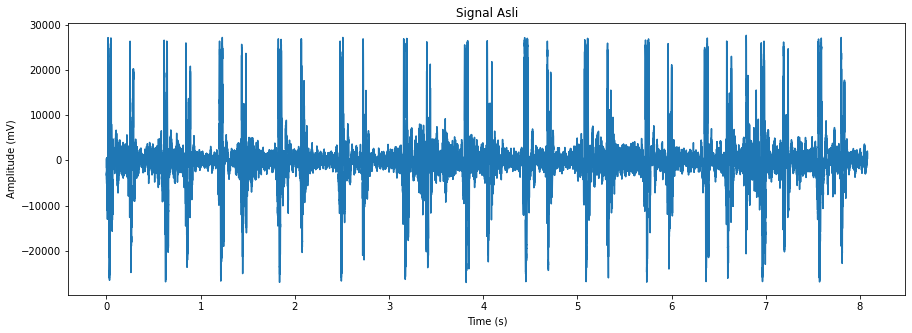

THRESHOLD S1


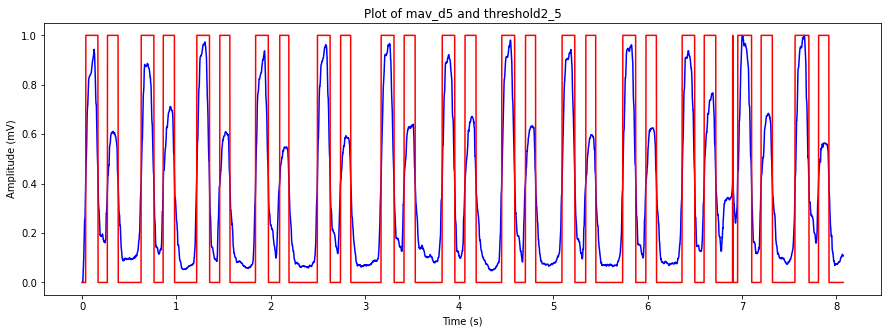

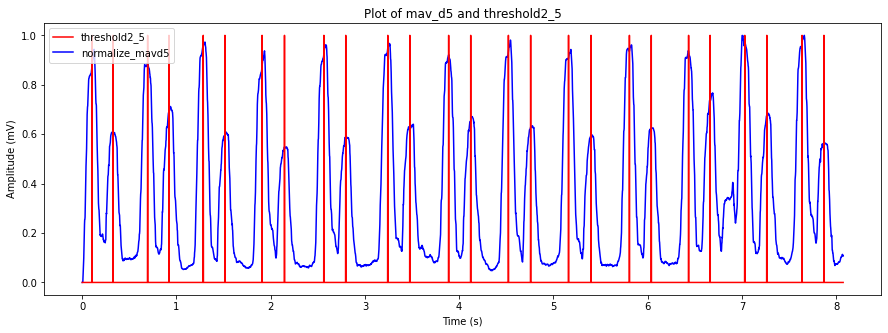

THRESHOLD S2


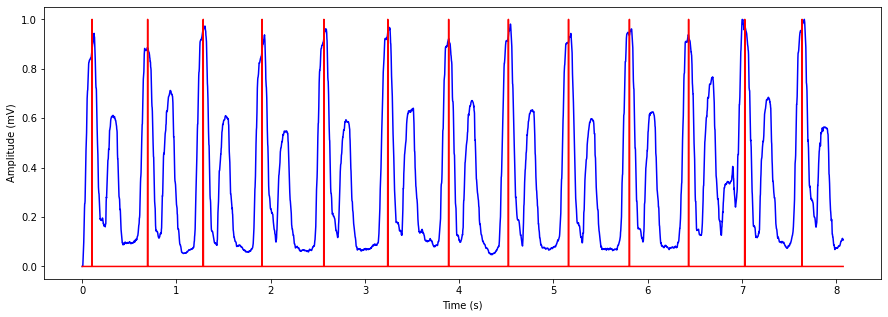

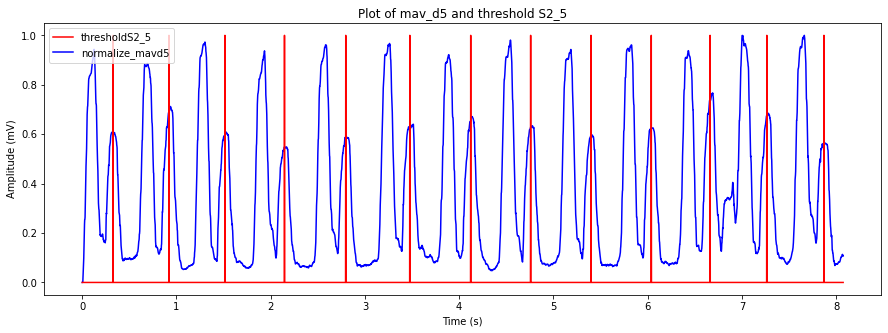

In [55]:
# Plot the signal
plt.figure(figsize=(15, 5))
#plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()



plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_threshold2, res, color='red', label='threshold2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')

##################################################################3

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdAll, resAll, color='red', label='threshold2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()

######################################################


######################################################


print("THRESHOLD S1")
# tampilkan grafik
plt.show()

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdS1, cobaS1, color='red', label='thresholdS1_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')



##########################################

print("THRESHOLD S2")
# tampilkan grafik
plt.show()

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdS2, cobaS2, color='red', label='thresholdS2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold S2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()

# tampilkan grafik
plt.show()

In [56]:
def dft(s1, fs1):
    ndata = len(s1)
    sreal = [0] * ndata
    simaj = [0] * ndata

    for k in range(ndata):
        for n in range(ndata):
            sreal[k] += s1[n] * math.cos((2 * math.pi * k * n) / ndata)
            simaj[k] -= s1[n] * math.sin((2 * math.pi * k * n) / ndata)

    mag = [0] * ndata
    for k in range(ndata):
        mag[k] = math.sqrt(sreal[k] ** 2 + simaj[k] ** 2)

    # Plotting the magnitude spectrum using bar chart
    x = [(k * fs1) / ndata for k in range(ndata // 2)]
    plt.bar(x, mag[:ndata // 2])
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum')
    plt.show()

    # Compute the Mean Power Frequency (MPF)
    total_power = np.sum(mag[:ndata // 2])
    sum_product = np.sum(np.array(x) * np.array(mag[:ndata // 2]))
    mpf = sum_product / total_power

    max_magnitude = max(mag[:ndata // 2])
    max_magnitude_index = mag[:ndata // 2].index(max_magnitude)
    mpf2 = x[max_magnitude_index]

    print("DFT")
    print("MPF 1:", mpf)
    print("MPF 2:", mpf2)

    for k in range(ndata // 2):
        print("frekuensi : ", x[k], "magnitude:", mag[k])


In [57]:
import math
import matplotlib.pyplot as plt
import numpy as np

def dft2(s1, fs1):
    ndata = len(s1)
    sreal = [0] * ndata
    simaj = [0] * ndata

    for k in range(ndata):
        for n in range(ndata):
            sreal[k] += s1[n] * math.cos((2 * math.pi * k * n) / ndata)
            simaj[k] -= s1[n] * math.sin((2 * math.pi * k * n) / ndata)

    mag = []
    x = []
    for k in range(1, ndata // 2):
        x.append((k * fs1) / ndata)
        mag.append(math.sqrt(sreal[k] ** 2 + simaj[k] ** 2))

    # Plotting the magnitude spectrum using bar chart
    plt.bar(x, mag)
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.title('Magnitude Spectrum')
    plt.show()

    # Compute the Mean Power Frequency (MPF)
    total_power = np.sum(mag)
    sum_product = np.sum(np.array(x) * np.array(mag))
    mpf = sum_product / total_power

    max_magnitude = max(mag)
    max_magnitude_index = mag.index(max_magnitude)
    mpf2 = x[max_magnitude_index]

    print("DFT")
    print("MPF 1:", mpf)
    print("MPF 2:", mpf2)

    for k in range(len(x)):
        print("frekuensi:", x[k], "magnitude:", mag[k])


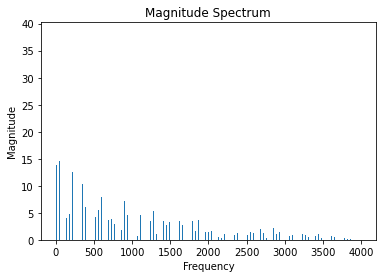

DFT
MPF 1: 1116.9386996409153
MPF 2: 150.56958890539872
frekuensi: 3.9623576027736505 magnitude: 13.122760231761657
frekuensi: 7.924715205547301 magnitude: 13.849155102967055
frekuensi: 11.887072808320951 magnitude: 6.596713362590543
frekuensi: 15.849430411094602 magnitude: 7.375384194836189
frekuensi: 19.811788013868252 magnitude: 14.226017759717648
frekuensi: 23.774145616641903 magnitude: 2.422278429729646
frekuensi: 27.736503219415553 magnitude: 5.025695675637502
frekuensi: 31.698860822189204 magnitude: 4.645944356474744
frekuensi: 35.661218424962854 magnitude: 8.398950051088407
frekuensi: 39.623576027736505 magnitude: 3.6042898049661147
frekuensi: 43.585933630510155 magnitude: 4.888375082165783
frekuensi: 47.548291233283805 magnitude: 14.609391048090078
frekuensi: 51.510648836057456 magnitude: 20.85449929657316
frekuensi: 55.473006438831106 magnitude: 9.06782042837465
frekuensi: 59.43536404160476 magnitude: 4.293919319454655
frekuensi: 63.39772164437841 magnitude: 4.535521229222106

In [58]:
coba_dft2 =  dft2(normalize_mavd5, 8000)

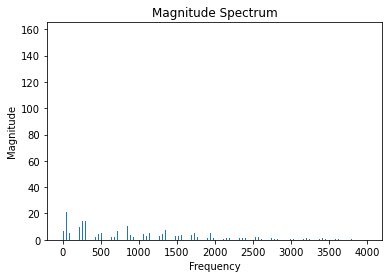

DFT
MPF 1: 1059.9504109978936
MPF 2: 0.0
frekuensi :  0.0 magnitude: 157.43613505063604
frekuensi :  3.9623576027736505 magnitude: 13.122760231761657
frekuensi :  7.924715205547301 magnitude: 13.849155102967055
frekuensi :  11.887072808320951 magnitude: 6.596713362590543
frekuensi :  15.849430411094602 magnitude: 7.375384194836189
frekuensi :  19.811788013868252 magnitude: 14.226017759717648
frekuensi :  23.774145616641903 magnitude: 2.422278429729646
frekuensi :  27.736503219415553 magnitude: 5.025695675637502
frekuensi :  31.698860822189204 magnitude: 4.645944356474744
frekuensi :  35.661218424962854 magnitude: 8.398950051088407
frekuensi :  39.623576027736505 magnitude: 3.6042898049661147
frekuensi :  43.585933630510155 magnitude: 4.888375082165783
frekuensi :  47.548291233283805 magnitude: 14.609391048090078
frekuensi :  51.510648836057456 magnitude: 20.85449929657316
frekuensi :  55.473006438831106 magnitude: 9.06782042837465
frekuensi :  59.43536404160476 magnitude: 4.29391931945

frekuensi :  3732.5408618127785 magnitude: 0.7474842808569515
frekuensi :  3736.5032194155524 magnitude: 0.2644983671166767
frekuensi :  3740.465577018326 magnitude: 0.28421879833587066
frekuensi :  3744.4279346210997 magnitude: 0.40572963020875974
frekuensi :  3748.390292223873 magnitude: 0.6561720990713029
frekuensi :  3752.352649826647 magnitude: 0.6845340582729379
frekuensi :  3756.3150074294203 magnitude: 0.14698012687182166
frekuensi :  3760.277365032194 magnitude: 0.1806526811942008
frekuensi :  3764.2397226349676 magnitude: 0.4136054620036054
frekuensi :  3768.2020802377415 magnitude: 0.05417179217868165
frekuensi :  3772.164437840515 magnitude: 0.2254375905128527
frekuensi :  3776.1267954432888 magnitude: 0.32113610949406657
frekuensi :  3780.0891530460626 magnitude: 0.2829133204339515
frekuensi :  3784.051510648836 magnitude: 0.31017988823290427
frekuensi :  3788.01386825161 magnitude: 0.33546802134319326
frekuensi :  3791.9762258543833 magnitude: 0.294820186986465
frekuensi 

In [59]:
coba_dft =  dft(normalize_mavd5, 8000)

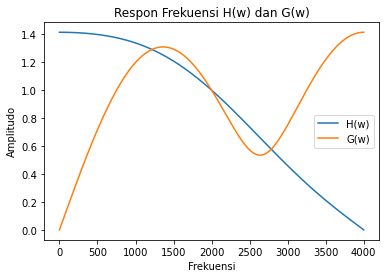

In [13]:
def respon_frekuensi_hg(fs, g, h):
    Hw = np.zeros(800000)
    Gw = np.zeros(800000)

    for i in range(fs+1):
        reH = 0
        imH = 0
        reG = 0
        imG = 0

        for k in range(-1, 3):
            reG += g[k] * np.cos(k * 2 * np.pi * i / fs)
            imG -= g[k] * np.sin(k * 2 * np.pi * i / fs)
            reH += h[k] * np.cos(k * 2 * np.pi * i / fs)
            imH -= h[k] * np.sin(k * 2 * np.pi * i / fs)

        Hw[i] = np.sqrt(reH**2 + imH**2)
        Gw[i] = np.sqrt(reG**2 + imG**2)

    plt.plot(range(int(fs/2)+1), Hw[:int(fs/2)+1])
    plt.plot(range(int(fs/2)+1), Gw[:int(fs/2)+1])
    plt.xlabel('Frekuensi')
    plt.ylabel('Amplitudo')
    plt.title('Respon Frekuensi H(w) dan G(w)')
    plt.legend(['H(w)', 'G(w)'])
    plt.show()
    
    return Hw, Gw

fs = 8000  # Jumlah sampel

Hw,Gw=respon_frekuensi_hg(fs, g, h)

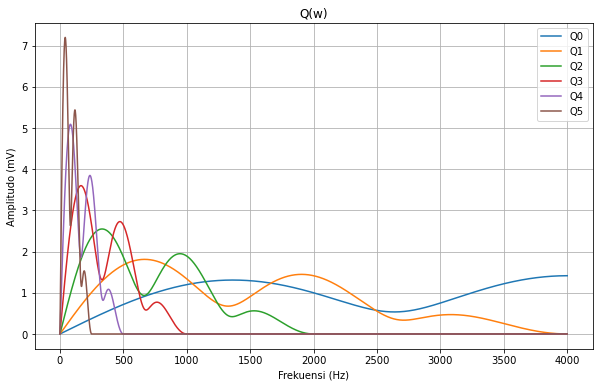

Q0 = 0 - 4000.0
Q1 = 0 - 4000.0
Q2 = 0 - 2000.0
Q3 = 0 - 1000.0
Q4 = 0 - 500.0
Q5 = 0 - 250.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt

def Qj_w(fs, Gw, Hw):
    Q = np.zeros((9, 80000))

    for i in range(1, round(fs/2)+1):
        Q[1, i] = Gw[i]
        Q[2, i] = Gw[2*i] * Hw[i]
        Q[3, i] = Gw[4*i] * Hw[2*i] * Hw[i]
        Q[4, i] = Gw[8*i] * Hw[4*i] * Hw[2*i] * Hw[i]
        Q[5, i] = Gw[16*i] * Hw[8*i] * Hw[4*i] * Hw[2*i] * Hw[i]
        Q[6, i] = Gw[32*i] * Hw[16*i] * Hw[8*i] * Hw[4*i] * Hw[2*i] * Hw[i]

    plt.figure(figsize=(10, 6))
    plt.plot(range(int(fs/2)+1), Q[1, :int(fs/2)+1], label='Q0')
    plt.plot(range(int(fs/2)+1), Q[2, :int(fs/2)+1], label='Q1')
    plt.plot(range(int(fs/2)+1), Q[3, :int(fs/2)+1], label='Q2')
    plt.plot(range(int(fs/2)+1), Q[4, :int(fs/2)+1], label='Q3')
    plt.plot(range(int(fs/2)+1), Q[5, :int(fs/2)+1], label='Q4')
    plt.plot(range(int(fs/2)+1), Q[6, :int(fs/2)+1], label='Q5')

    plt.xlabel('Frekuensi (Hz)')
    plt.ylabel('Amplitudo (mV)')
    plt.title('Q(w)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("Q0 = 0 -", fs/2**1)

    for i in range(1, 6):
        print("Q{} = 0 - {}".format(i, fs/2**i))

# Contoh penggunaan
fs = 8000
# Jumlah sampel

Qj_w(fs, Gw, Hw)


In [62]:
a1_rekonstruksi = rekonstruksi(a1, d1)

In [63]:
print(amplitude_right.shape)
a1_array = np.array(a1_rekonstruksi)
print(a1_array.shape)
#print(Y1_lib.shape)

(64624,)
(64624,)


In [64]:
### import numpy as np

#def calculate_mae(signal1, signal2):
    #mae = np.mean(np.abs(signal1 - signal2))
    #return mae

#mae_a1 = calculate_mae(a1_rekonstruksi, Y1_lib)
#mae_a2 = calculate_mae(a2_rekonstruksi, Y2_lib)
# Hitung MAE untuk sinyal lainnya

#print("MAE for a1:", mae_a1)
#print("MAE for a2:", mae_a2)
# Cetak MAE untuk sinyal lainnya

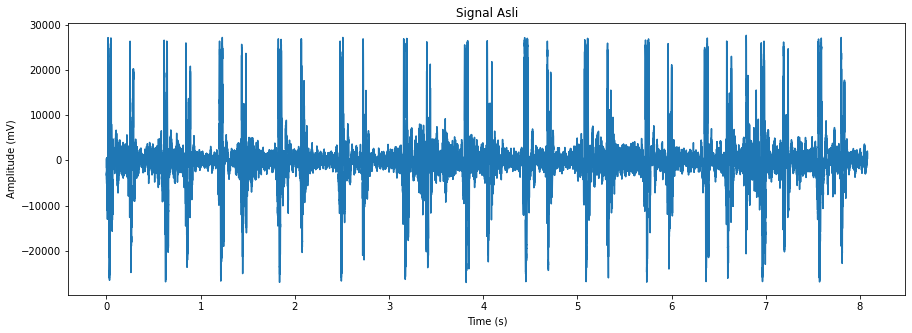

THRESHOLD S1


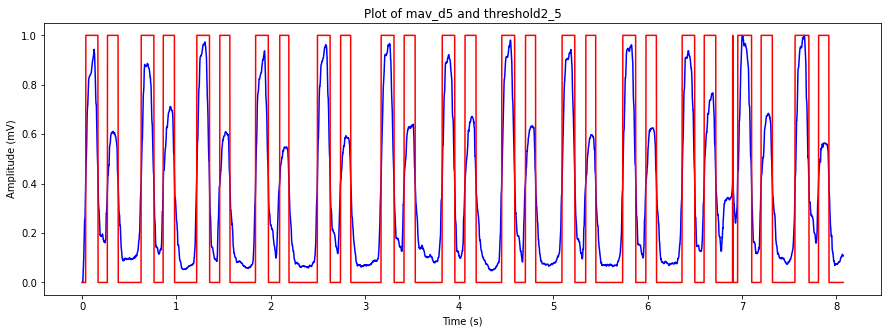

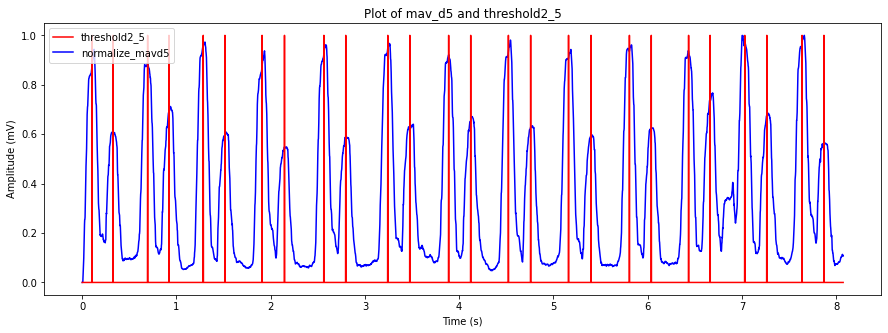

THRESHOLD S2


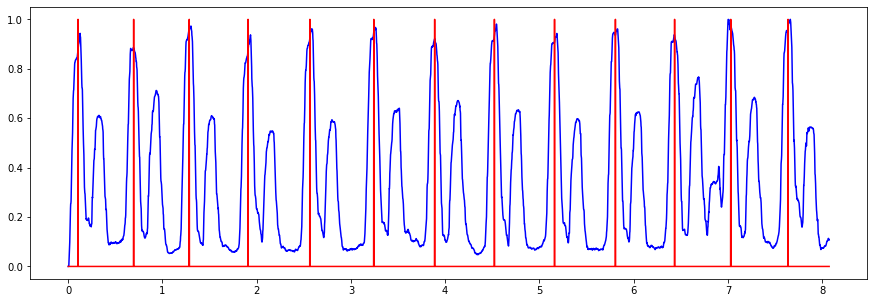

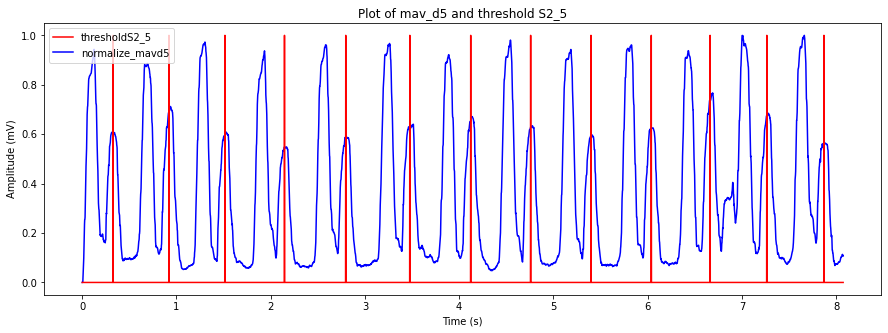

In [65]:
# Plot the signal
plt.figure(figsize=(15, 5))
#plt.subplot(211)
plt.plot(time, amplitude_right)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.title('Signal Asli')
plt.show()



plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_threshold2, res, color='red', label='threshold2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold2_5")
plt.xlabel("Sample")
plt.ylabel("Amplitude/Threshold")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')

##################################################################3

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdAll, resAll, color='red', label='threshold2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()

######################################################


######################################################


print("THRESHOLD S1")
# tampilkan grafik
plt.show()

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdS1, cobaS1, color='red', label='thresholdS1_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)



##########################################

print("THRESHOLD S2")
# tampilkan grafik
plt.show()

plt.figure(figsize=(15, 5))

# plot threshold2_5 terlebih dahulu
plt.plot(time_thresholdS2, cobaS2, color='red', label='thresholdS2_5', zorder=2)

# plot mav_d5 di atas threshold2_5
plt.plot(time_normalize,normalize_rekon5, color='blue', label='normalize_mavd5', zorder=1)


# tambahkan judul, label sumbu, dan legenda
plt.title("Plot of mav_d5 and threshold S2_5")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')
plt.legend()

# tampilkan grafik
plt.show()